Number of iterations:  100


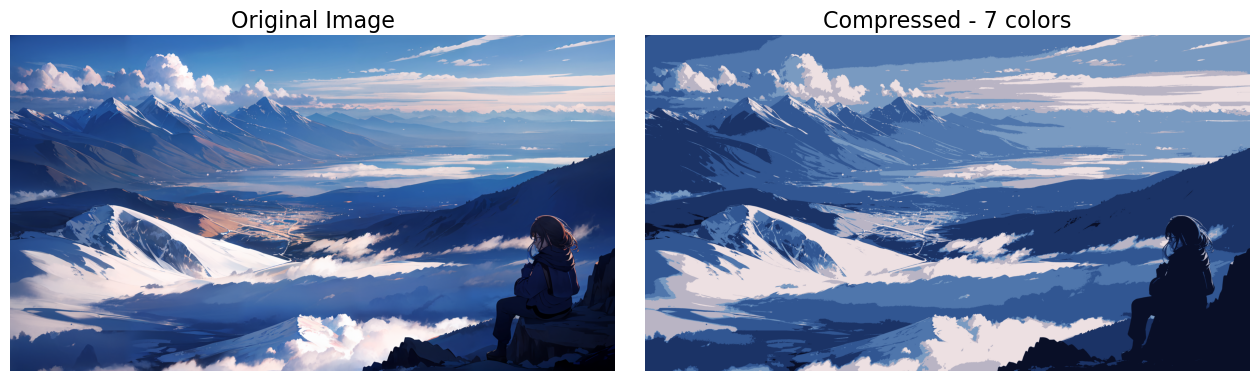

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def get_labels(dataSet, centroids):
       distances=np.linalg.norm((dataSet[:, np.newaxis]-centroids)**2, axis=2)
       return np.argmin(distances, axis=1)

# Trả về tọa độ mới cho k centroids của mỗi chiều.
def get_centroids(dataSet, labels, k):
     centroids = []
     for j in np.arange(k):
        # Lấy index cho mỗi centroids
         idx_j = np.where(np.array(labels) == j)[0]
         centroid_j = dataSet[idx_j, :].mean(axis=0)
         centroids.append(centroid_j)
     return np.array(centroids)   

def k_means(image, k_clusters, max_iter, init_centroids='random'):
#     #chuyen doi anh dau vao thanh mang numpy
      im_array=np.array(image)

#     #chuyen doi mang 3D thang mang 2D
      m, n = im_array.shape[0]*im_array.shape[1], im_array.shape[2]
      #                    100, 3
      # data -> (1,2, 3), (1,2, 4), (1,2, 5)... 100 điểm
      reshaped_im=im_array.reshape(m, n)
      centroids=np.zeros((k_clusters, n))
      #[a, b, c, 0, 0, 0, 0]

#     #khởi tạo các centroids ngẫu nhiên
      for i in range(k_clusters):
            indexs = np.random.choice(m, 10, replace=False)
            centroids[i] = np.mean(reshaped_im[indexs], axis=0)

      labels = np.zeros(m)

      # Vòng lặp kmeans
      count = 0
      while max_iter > 0:
            count+=1
            #1. Gán nhãn
            labels = get_labels(reshaped_im, centroids)

            #2. cập nhật centroids
            centroids = get_centroids(reshaped_im, labels, k_clusters)
            max_iter  -= 1
      # gán lại mỗi điểm dữ liệu trong ảnh vào cluster gần nhất
      centroids = np.array(centroids)
      compressed_image=centroids[labels.astype(int), :]
      print("Number of iterations: ", count)
      # getting back the 2d->3d matrix (row, col, rgb(3))
      compressed_image = compressed_image.astype(np.uint8)
      compressed_image=compressed_image.reshape(im_array.shape)
      compressed_image = Image.fromarray(compressed_image)

      return compressed_image

if __name__=='__main__':
    path_image=input('Enter the path of the image: ')
    im=Image.open(path_image)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    
    k_clusters=int(input('Enter the number of colors in the compressed image: '))
    file=input("Enter the file type want to save (png or pdf): ")
    
    ax[0].imshow(im)
    ax[0].axis('off')
    ax[0].set_title(f"Original Image", size=16)
    
    max_iter=100
    compressed_image=k_means(im,k_clusters,max_iter)
    
    ax[1].imshow(compressed_image)  
    ax[1].set_title ("Compressed - "+str(k_clusters)+" colors", size=16)
    ax[1].axis('off')
    
    compressed_image.save("Compressed - "+str(k_clusters)+" colors."+str(file),str(file), resolution=100.0)
    



 
    
    